In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 8.7 MB/s 


In [ ]:
!jupyter nbconvert --to pdf /content/190651_RavelingDetection.ipynb

[NbConvertApp] Converting notebook /content/190651_RavelingDetection.ipynb to pdf
[NbConvertApp] Support files will be in 190651_RavelingDetection_files/
[NbConvertApp] Making directory ./190651_RavelingDetection_files
[NbConvertApp] Making directory ./190651_RavelingDetection_files
[NbConvertApp] Making directory ./190651_RavelingDetection_files
[NbConvertApp] Writing 193619 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 218645 bytes to /content/190651_RavelingDetection.pdf


In [ ]:
import matplotlib.pyplot as plt
import os
import glob
import skimage
from skimage import io, color
from skimage.feature.texture import greycomatrix, greycoprops
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import tensorflow_addons as tfa
% matplotlib inline

In [ ]:
train_root = '/content/drive/MyDrive/CE784/mod_ravelling_dataset/train'

In [ ]:
classes = ['Non_raveling', 'Raveling']

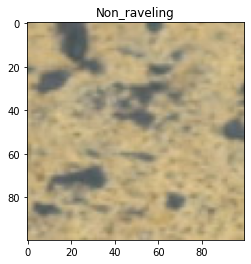

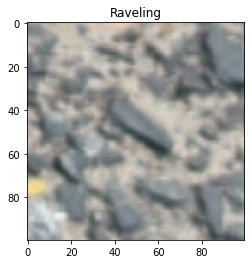

In [ ]:
for i in range(2):
  path = os.path.join(train_root,classes[i],'*')
  path = glob.glob(path)
  image = io.imread(path[4])

  # plotting the original image
  fig, ax = plt.subplots()
  ax.set_title(classes[i])
  fig.set_figwidth(10)
  ax.imshow(image)
  # ax.imshow(image[:,:,0]) plots only red channel

In [ ]:
def trainFeatures(train_root, classes):

  train_dict = {}

  train_dict['entropy10'] = []
  train_dict['entropy50'] = []
  train_dict['entropy100'] = []
  train_dict['entropy150'] = []

  train_dict['contrast10'] = []
  train_dict['contrast50'] = []
  train_dict['contrast100'] = []
  train_dict['contrast150'] = []

  train_dict['asm10'] = []
  train_dict['asm50'] = []
  train_dict['asm100'] = []
  train_dict['asm150'] = []

  train_dict['corel10'] = []
  train_dict['corel50'] = []
  train_dict['corel100'] = []
  train_dict['corel150'] = []

  train_dict['entropy11'] = []
  train_dict['entropy51'] = []
  train_dict['entropy101'] = []
  train_dict['entropy151'] = []

  train_dict['contrast11'] = []
  train_dict['contrast51'] = []
  train_dict['contrast101'] = []
  train_dict['contrast151'] = []

  train_dict['asm11'] = []
  train_dict['asm51'] = []
  train_dict['asm101'] = []
  train_dict['asm151'] = []

  train_dict['corel11'] = []
  train_dict['corel51'] = []
  train_dict['corel101'] = []
  train_dict['corel151'] = []

  train_dict['entropy12'] = []
  train_dict['entropy52'] = []
  train_dict['entropy102'] = []
  train_dict['entropy152'] = []

  train_dict['contrast12'] = []
  train_dict['contrast52'] = []
  train_dict['contrast102'] = []
  train_dict['contrast152'] = []

  train_dict['asm12'] = []
  train_dict['asm52'] = []
  train_dict['asm102'] = []
  train_dict['asm152'] = []

  train_dict['corel12'] = []
  train_dict['corel52'] = []
  train_dict['corel102'] = []
  train_dict['corel152'] = []

  train_dict['entropy13'] = []
  train_dict['entropy53'] = []
  train_dict['entropy103'] = []
  train_dict['entropy153'] = []

  train_dict['contrast13'] = []
  train_dict['contrast53'] = []
  train_dict['contrast103'] = []
  train_dict['contrast153'] = []

  train_dict['asm13'] = []
  train_dict['asm53'] = []
  train_dict['asm103'] = []
  train_dict['asm153'] = []

  train_dict['corel13'] = []
  train_dict['corel53'] = []
  train_dict['corel103'] = []
  train_dict['corel153'] = []

  train_dict['b_mean'] = []
  train_dict['g_mean'] = []
  train_dict['r_mean'] = []

  train_dict['b_std'] = []
  train_dict['g_std'] = []
  train_dict['r_std'] = []

  train_dict['b_kurtosis'] = []
  train_dict['g_kurtosis'] = []
  train_dict['r_kurtosis'] = []

  train_dict['b_skew'] = []
  train_dict['g_skew'] = []
  train_dict['r_skew'] = []

  train_dict['labels'] = []

  for i in range(2):
    paths = os.path.join(train_root,classes[i],'*')
    paths = glob.glob(paths)

    for path in paths:
      img = cv2.imread(path)
      greyImg = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

      if(i==0):
        train_dict['labels'] .append(0)
      else:
        train_dict['labels'] .append(1)

      g10 = greycomatrix(greyImg, [1], [0])
      train_dict['entropy10'].append(skimage.measure.shannon_entropy(np.reshape(g10,(256,256))))
      train_dict['contrast10'].append(greycoprops(g10,'contrast')[0][0])
      train_dict['asm10'].append(greycoprops(g10,'ASM')[0][0])
      train_dict['corel10'].append(greycoprops(g10,'correlation')[0][0])

      g11 = greycomatrix(greyImg, [1], [np.pi/4])
      train_dict['entropy11'].append(skimage.measure.shannon_entropy(np.reshape(g11,(256,256))))
      train_dict['contrast11'].append(greycoprops(g11,'contrast')[0][0])
      train_dict['asm11'].append(greycoprops(g11,'ASM')[0][0])
      train_dict['corel11'].append(greycoprops(g11,'correlation')[0][0])

      g12 = greycomatrix(greyImg, [1], [np.pi/2])
      train_dict['entropy12'].append(skimage.measure.shannon_entropy(np.reshape(g12,(256,256))))
      train_dict['contrast12'].append(greycoprops(g12,'contrast')[0][0])
      train_dict['asm12'].append(greycoprops(g12,'ASM')[0][0])
      train_dict['corel12'].append(greycoprops(g12,'correlation')[0][0])

      g13 = greycomatrix(greyImg, [1], [3*np.pi/4])
      train_dict['entropy13'].append(skimage.measure.shannon_entropy(np.reshape(g13,(256,256))))
      train_dict['contrast13'].append(greycoprops(g13,'contrast')[0][0])
      train_dict['asm13'].append(greycoprops(g13,'ASM')[0][0])
      train_dict['corel13'].append(greycoprops(g13,'correlation')[0][0])

      g50 = greycomatrix(greyImg, [5], [0])
      train_dict['entropy50'].append(skimage.measure.shannon_entropy(np.reshape(g50,(256,256))))
      train_dict['contrast50'].append(greycoprops(g50,'contrast')[0][0])
      train_dict['asm50'].append(greycoprops(g50,'ASM')[0][0])
      train_dict['corel50'].append(greycoprops(g50,'correlation')[0][0])

      g51 = greycomatrix(greyImg, [5], [np.pi/4])
      train_dict['entropy51'].append(skimage.measure.shannon_entropy(np.reshape(g51,(256,256))))
      train_dict['contrast51'].append(greycoprops(g51,'contrast')[0][0])
      train_dict['asm51'].append(greycoprops(g51,'ASM')[0][0])
      train_dict['corel51'].append(greycoprops(g51,'correlation')[0][0])

      g52 = greycomatrix(greyImg, [5], [np.pi/2])
      train_dict['entropy52'].append(skimage.measure.shannon_entropy(np.reshape(g52,(256,256))))
      train_dict['contrast52'].append(greycoprops(g52,'contrast')[0][0])
      train_dict['asm52'].append(greycoprops(g52,'ASM')[0][0])
      train_dict['corel52'].append(greycoprops(g52,'correlation')[0][0])

      g53 = greycomatrix(greyImg, [5], [3*np.pi/4])
      train_dict['entropy53'].append(skimage.measure.shannon_entropy(np.reshape(g53,(256,256))))
      train_dict['contrast53'].append(greycoprops(g53,'contrast')[0][0])
      train_dict['asm53'].append(greycoprops(g53,'ASM')[0][0])
      train_dict['corel53'].append(greycoprops(g53,'correlation')[0][0])

      g100 = greycomatrix(greyImg, [10], [0])
      train_dict['entropy100'].append(skimage.measure.shannon_entropy(np.reshape(g100,(256,256))))
      train_dict['contrast100'].append(greycoprops(g100,'contrast')[0][0])
      train_dict['asm100'].append(greycoprops(g100,'ASM')[0][0])
      train_dict['corel100'].append(greycoprops(g100,'correlation')[0][0])

      g101 = greycomatrix(greyImg, [10], [np.pi/4])
      train_dict['entropy101'].append(skimage.measure.shannon_entropy(np.reshape(g101,(256,256))))
      train_dict['contrast101'].append(greycoprops(g101,'contrast')[0][0])
      train_dict['asm101'].append(greycoprops(g101,'ASM')[0][0])
      train_dict['corel101'].append(greycoprops(g101,'correlation')[0][0])

      g102 = greycomatrix(greyImg, [10], [np.pi/2])
      train_dict['entropy102'].append(skimage.measure.shannon_entropy(np.reshape(g102,(256,256))))
      train_dict['contrast102'].append(greycoprops(g102,'contrast')[0][0])
      train_dict['asm102'].append(greycoprops(g102,'ASM')[0][0])
      train_dict['corel102'].append(greycoprops(g102,'correlation')[0][0])

      g103 = greycomatrix(greyImg, [10], [3*np.pi/4])
      train_dict['entropy103'].append(skimage.measure.shannon_entropy(np.reshape(g103,(256,256))))
      train_dict['contrast103'].append(greycoprops(g103,'contrast')[0][0])
      train_dict['asm103'].append(greycoprops(g103,'ASM')[0][0])
      train_dict['corel103'].append(greycoprops(g103,'correlation')[0][0])

      g150 = greycomatrix(greyImg, [15], [0])
      train_dict['entropy150'].append(skimage.measure.shannon_entropy(np.reshape(g150,(256,256))))
      train_dict['contrast150'].append(greycoprops(g150,'contrast')[0][0])
      train_dict['asm150'].append(greycoprops(g150,'ASM')[0][0])
      train_dict['corel150'].append(greycoprops(g150,'correlation')[0][0])

      g151 = greycomatrix(greyImg, [15], [np.pi/4])
      train_dict['entropy151'].append(skimage.measure.shannon_entropy(np.reshape(g151,(256,256))))
      train_dict['contrast151'].append(greycoprops(g151,'contrast')[0][0])
      train_dict['asm151'].append(greycoprops(g151,'ASM')[0][0])
      train_dict['corel151'].append(greycoprops(g151,'correlation')[0][0])

      g152 = greycomatrix(greyImg, [15], [np.pi/2])
      train_dict['entropy152'].append(skimage.measure.shannon_entropy(np.reshape(g152,(256,256))))
      train_dict['contrast152'].append(greycoprops(g152,'contrast')[0][0])
      train_dict['asm152'].append(greycoprops(g152,'ASM')[0][0])
      train_dict['corel152'].append(greycoprops(g152,'correlation')[0][0])

      g153 = greycomatrix(greyImg, [15], [3*np.pi/4])
      train_dict['entropy153'].append(skimage.measure.shannon_entropy(np.reshape(g153,(256,256))))
      train_dict['contrast153'].append(greycoprops(g153,'contrast')[0][0])
      train_dict['asm153'].append(greycoprops(g153,'ASM')[0][0])
      train_dict['corel153'].append(greycoprops(g153,'correlation')[0][0])

      b = img[:,:,0]
      g = img[:,:,1]
      r = img[:,:,2]

      train_dict['b_mean'].append(np.mean(b))
      train_dict['g_mean'].append(np.mean(g))
      train_dict['r_mean'].append(np.mean(r))

      train_dict['b_std'].append(np.std(b))
      train_dict['g_std'].append(np.std(g))
      train_dict['r_std'].append(np.std(r))

      train_dict['b_kurtosis'].append(np.mean(kurtosis(b)))
      train_dict['g_kurtosis'].append(np.mean(kurtosis(g)))
      train_dict['r_kurtosis'].append(np.mean(kurtosis(r)))

      train_dict['b_skew'].append(np.mean(skew(b)))
      train_dict['g_skew'].append(np.mean(skew(g)))
      train_dict['r_skew'].append(np.mean(skew(r)))

  return train_dict

In [ ]:
df_train = pd.DataFrame.from_dict(trainFeatures(train_root, classes))

In [ ]:
df_train.head()

,entropy10,entropy50,entropy100,entropy150,contrast10,contrast50,contrast100,contrast150,asm10,asm50,asm100,asm150,corel10,corel50,corel100,corel150,entropy11,entropy51,entropy101,entropy151,contrast11,contrast51,contrast101,contrast151,asm11,asm51,asm101,asm151,corel11,corel51,corel101,corel151,entropy12,entropy52,entropy102,entropy152,contrast12,contrast52,contrast102,contrast152,asm12,asm52,asm102,asm152,corel12,corel52,corel102,corel152,entropy13,entropy53,entropy103,entropy153,contrast13,contrast53,contrast103,contrast153,asm13,asm53,asm103,asm153,corel13,corel53,corel103,corel153,b_mean,g_mean,r_mean,b_std,g_std,r_std,b_kurtosis,g_kurtosis,r_kurtosis,b_skew,g_skew,r_skew,labels
0,0.388025,0.498216,0.492849,0.484159,71.779495,572.858737,763.038111,796.573529,0.000746,0.000365,0.000350,0.000344,0.911449,0.293873,0.069091,0.045362,0.455760,0.494597,0.477975,0.457373,222.162943,732.134223,745.541450,712.979422,0.000491,0.000357,0.000362,0.000367,0.725524,0.075347,0.051539,0.106638,0.440793,0.503577,0.490079,0.473179,166.794646,794.815789,748.445667,787.717882,0.000552,0.000351,0.000355,0.000360,0.793792,-0.007801,0.043336,-0.007897,0.458740,0.495508,0.478647,0.459870,215.095602,761.752279,762.723667,733.191390,0.000489,0.000357,0.000363,0.000362,0.734240,0.037108,0.025263,0.071320,123.1838,122.4399,121.7237,19.752615,20.404543,19.863775,1.051243,0.933247,0.826803,0.219601,0.199535,0.173556,0
1,0.187276,0.252093,0.260474,0.255675,13.627273,104.525053,155.426111,195.364706,0.009562,0.003846,0.003305,0.003029,0.960507,0.689877,0.538901,0.422335,0.214765,0.260038,0.266182,0.262028,27.847465,127.254449,209.812579,305.841560,0.006512,0.003326,0.002991,0.002721,0.919658,0.634167,0.399151,0.148053,0.206362,0.271909,0.276989,0.276206,20.096869,151.292737,270.759111,358.590000,0.007434,0.003228,0.002839,0.002567,0.942264,0.577563,0.270580,0.057356,0.221074,0.267253,0.267551,0.260779,33.414345,156.112630,223.017227,296.336574,0.006114,0.003246,0.002894,0.002690,0.903435,0.549236,0.357726,0.168394,89.5107,86.0673,81.1905,11.410893,12.851365,14.606198,2.437372,2.079833,1.947910,1.376175,1.330405,1.292441,0
2,0.547597,0.593287,0.577825,0.556052,262.801010,1604.663053,1827.319444,1819.984588,0.000284,0.000204,0.000204,0.000210,0.848027,0.074715,-0.041170,-0.036366,0.569304,0.587249,0.564839,0.533894,406.476992,1570.924262,1758.415539,1820.725540,0.000249,0.000200,0.000203,0.000214,0.765505,0.101791,0.008030,-0.011985,0.550002,0.596299,0.578586,0.558178,270.950101,1641.086526,1694.665889,1754.180706,0.000284,0.000200,0.000202,0.000208,0.843240,0.056709,0.037315,0.011359,0.581729,0.586363,0.563112,0.533105,555.684012,1735.104058,1811.984276,1825.948618,0.000233,0.000201,0.000208,0.000212,0.679427,0.005670,-0.027090,-0.017056,127.6019,128.3861,128.5841,27.128756,29.288288,30.507962,-0.176870,-0.233946,-0.259970,0.121036,0.091061,0.048257,0
3,0.286871,0.405760,0.404691,0.392159,34.451717,290.112211,388.211778,409.429294,0.001382,0.000601,0.000568,0.000572,0.920392,0.323243,0.095257,0.046235,0.362986,0.411522,0.397934,0.381388,119.678094,397.235243,406.175858,414.412069,0.000826,0.000559,0.000558,0.000581,0.722428,0.079405,0.056667,0.031548,0.343321,0.419419,0.407420,0.390936,86.881919,415.340105,419.524111,377.134353,0.000966,0.000550,0.000554,0.000570,0.798659,0.044140,0.030729,0.122640,0.359227,0.409677,0.399499,0.381611,104.801449,428.388455,400.062782,416.947481,0.000846,0.000551,0.000562,0.000581,0.756867,0.001973,0.069137,0.037665,95.9924,94.2042,92.8415,14.421239,14.975310,14.473347,0.719408,0.671750,0.787340,0.404107,0.388185,0.422230,0
4,0.363263,0.473995,0.475863,0.468022,56.213636,572.849158,995.223556,1176.629294,0.001037,0.000504,0.000451,0.000434,0.953773,0.535718,0.194478,0.054761,0.419728,0.476150,0.466274,0.452744,144.790736,765.568902,1078.316453,1210.259437,0.000722,0.000466,0.000446,0.000423,0.880850,0.375794,0.127679,0.028454,0.396980,0.482675,0.478357,0.466263,98.597879,725.373789,1000.253667,1109.856118,0.000855,0.000476

In [ ]:
df_train = df_train.sample(frac = 1.0)

In [ ]:
X_train = df_train.drop('labels', axis=1)
y_train = df_train.labels

In [ ]:
input_shape = [X_train.shape[1]]

In [ ]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    # layers.Dense(256, activation='relu'),
    # layers.Dropout(0.2),
    # layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(1,activation = 'sigmoid'),
])

In [ ]:
metric = tfa.metrics.F1Score(num_classes=1, threshold=0.5)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)

loss_fn = keras.losses.BinaryCrossentropy()

model.compile(
    optimizer=opt,
    loss=loss_fn,
    metrics=[metric]
)
# early_stopping = callbacks.EarlyStopping(
#     min_delta=0.1,
#     patience=100,
#     restore_best_weights=True,
# )

Epoch 1/500
40/40 [==============================] - 2s 14ms/step - loss: 0.6858 - f1_score: 0.5928 - val_loss: 0.7196 - val_f1_score: 0.7170
Epoch 2/500
40/40 [==============================] - 0s 4ms/step - loss: 0.5601 - f1_score: 0.7029 - val_loss: 0.7000 - val_f1_score: 0.7379
Epoch 3/500
40/40 [==============================] - 0s 4ms/step - loss: 0.5022 - f1_score: 0.7720 - val_loss: 0.6591 - val_f1_score: 0.7473
Epoch 4/500
40/40 [==============================] - 0s 4ms/step - loss: 0.5002 - f1_score: 0.7488 - val_loss: 0.5751 - val_f1_score: 0.6579
Epoch 5/500
40/40 [==============================] - 0s 4ms/step - loss: 0.4789 - f1_score: 0.7712 - val_loss: 0.5284 - val_f1_score: 0.7692
Epoch 6/500
40/40 [==============================] - 0s 4ms/step - loss: 0.4360 - f1_score: 0.7961 - val_loss: 0.4714 - val_f1_score: 0.7606
Epoch 7/500
40/40 [==============================] - 0s 4ms/step - loss: 0.4578 - f1_score: 0.7801 - val_loss: 0.4099 - val_f1_score: 0.8974
Epoch 8/500


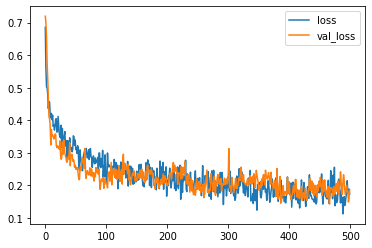

In [ ]:
epochs = 500
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=16,
    epochs=epochs,
    #callbacks=[early_stopping],
    verbose=1,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [ ]:
test_path = '/content/drive/MyDrive/CE784/mod_ravelling_dataset/test'

In [ ]:
def testFeatures(test_path):

  test_dict = {}

  test_dict['entropy10'] = []
  test_dict['entropy50'] = []
  test_dict['entropy100'] = []
  test_dict['entropy150'] = []

  test_dict['contrast10'] = []
  test_dict['contrast50'] = []
  test_dict['contrast100'] = []
  test_dict['contrast150'] = []

  test_dict['asm10'] = []
  test_dict['asm50'] = []
  test_dict['asm100'] = []
  test_dict['asm150'] = []

  test_dict['corel10'] = []
  test_dict['corel50'] = []
  test_dict['corel100'] = []
  test_dict['corel150'] = []

  test_dict['entropy11'] = []
  test_dict['entropy51'] = []
  test_dict['entropy101'] = []
  test_dict['entropy151'] = []

  test_dict['contrast11'] = []
  test_dict['contrast51'] = []
  test_dict['contrast101'] = []
  test_dict['contrast151'] = []

  test_dict['asm11'] = []
  test_dict['asm51'] = []
  test_dict['asm101'] = []
  test_dict['asm151'] = []

  test_dict['corel11'] = []
  test_dict['corel51'] = []
  test_dict['corel101'] = []
  test_dict['corel151'] = []

  test_dict['entropy12'] = []
  test_dict['entropy52'] = []
  test_dict['entropy102'] = []
  test_dict['entropy152'] = []

  test_dict['contrast12'] = []
  test_dict['contrast52'] = []
  test_dict['contrast102'] = []
  test_dict['contrast152'] = []

  test_dict['asm12'] = []
  test_dict['asm52'] = []
  test_dict['asm102'] = []
  test_dict['asm152'] = []

  test_dict['corel12'] = []
  test_dict['corel52'] = []
  test_dict['corel102'] = []
  test_dict['corel152'] = []

  test_dict['entropy13'] = []
  test_dict['entropy53'] = []
  test_dict['entropy103'] = []
  test_dict['entropy153'] = []

  test_dict['contrast13'] = []
  test_dict['contrast53'] = []
  test_dict['contrast103'] = []
  test_dict['contrast153'] = []

  test_dict['asm13'] = []
  test_dict['asm53'] = []
  test_dict['asm103'] = []
  test_dict['asm153'] = []

  test_dict['corel13'] = []
  test_dict['corel53'] = []
  test_dict['corel103'] = []
  test_dict['corel153'] = []

  test_dict['b_mean'] = []
  test_dict['g_mean'] = []
  test_dict['r_mean'] = []

  test_dict['b_std'] = []
  test_dict['g_std'] = []
  test_dict['r_std'] = []

  test_dict['b_kurtosis'] = []
  test_dict['g_kurtosis'] = []
  test_dict['r_kurtosis'] = []

  test_dict['b_skew'] = []
  test_dict['g_skew'] = []
  test_dict['r_skew'] = []

  test_dict['filename'] = []



  for image in os.listdir(test_path):
    path = os.path.join(test_path, image)
    img = cv2.imread(path)
    greyImg = cv2.imread(path,cv2.IMREAD_GRAYSCALE)



    g10 = greycomatrix(greyImg, [1], [0])
    test_dict['entropy10'].append(skimage.measure.shannon_entropy(np.reshape(g10,(256,256))))
    test_dict['contrast10'].append(greycoprops(g10,'contrast')[0][0])
    test_dict['asm10'].append(greycoprops(g10,'ASM')[0][0])
    test_dict['corel10'].append(greycoprops(g10,'correlation')[0][0])

    g11 = greycomatrix(greyImg, [1], [np.pi/4])
    test_dict['entropy11'].append(skimage.measure.shannon_entropy(np.reshape(g11,(256,256))))
    test_dict['contrast11'].append(greycoprops(g11,'contrast')[0][0])
    test_dict['asm11'].append(greycoprops(g11,'ASM')[0][0])
    test_dict['corel11'].append(greycoprops(g11,'correlation')[0][0])

    g12 = greycomatrix(greyImg, [1], [np.pi/2])
    test_dict['entropy12'].append(skimage.measure.shannon_entropy(np.reshape(g12,(256,256))))
    test_dict['contrast12'].append(greycoprops(g12,'contrast')[0][0])
    test_dict['asm12'].append(greycoprops(g12,'ASM')[0][0])
    test_dict['corel12'].append(greycoprops(g12,'correlation')[0][0])

    g13 = greycomatrix(greyImg, [1], [3*np.pi/4])
    test_dict['entropy13'].append(skimage.measure.shannon_entropy(np.reshape(g13,(256,256))))
    test_dict['contrast13'].append(greycoprops(g13,'contrast')[0][0])
    test_dict['asm13'].append(greycoprops(g13,'ASM')[0][0])
    test_dict['corel13'].append(greycoprops(g13,'correlation')[0][0])

    g50 = greycomatrix(greyImg, [5], [0])
    test_dict['entropy50'].append(skimage.measure.shannon_entropy(np.reshape(g50,(256,256))))
    test_dict['contrast50'].append(greycoprops(g50,'contrast')[0][0])
    test_dict['asm50'].append(greycoprops(g50,'ASM')[0][0])
    test_dict['corel50'].append(greycoprops(g50,'correlation')[0][0])

    g51 = greycomatrix(greyImg, [5], [np.pi/4])
    test_dict['entropy51'].append(skimage.measure.shannon_entropy(np.reshape(g51,(256,256))))
    test_dict['contrast51'].append(greycoprops(g51,'contrast')[0][0])
    test_dict['asm51'].append(greycoprops(g51,'ASM')[0][0])
    test_dict['corel51'].append(greycoprops(g51,'correlation')[0][0])

    g52 = greycomatrix(greyImg, [5], [np.pi/2])
    test_dict['entropy52'].append(skimage.measure.shannon_entropy(np.reshape(g52,(256,256))))
    test_dict['contrast52'].append(greycoprops(g52,'contrast')[0][0])
    test_dict['asm52'].append(greycoprops(g52,'ASM')[0][0])
    test_dict['corel52'].append(greycoprops(g52,'correlation')[0][0])

    g53 = greycomatrix(greyImg, [5], [3*np.pi/4])
    test_dict['entropy53'].append(skimage.measure.shannon_entropy(np.reshape(g53,(256,256))))
    test_dict['contrast53'].append(greycoprops(g53,'contrast')[0][0])
    test_dict['asm53'].append(greycoprops(g53,'ASM')[0][0])
    test_dict['corel53'].append(greycoprops(g53,'correlation')[0][0])

    g100 = greycomatrix(greyImg, [10], [0])
    test_dict['entropy100'].append(skimage.measure.shannon_entropy(np.reshape(g100,(256,256))))
    test_dict['contrast100'].append(greycoprops(g100,'contrast')[0][0])
    test_dict['asm100'].append(greycoprops(g100,'ASM')[0][0])
    test_dict['corel100'].append(greycoprops(g100,'correlation')[0][0])

    g101 = greycomatrix(greyImg, [10], [np.pi/4])
    test_dict['entropy101'].append(skimage.measure.shannon_entropy(np.reshape(g101,(256,256))))
    test_dict['contrast101'].append(greycoprops(g101,'contrast')[0][0])
    test_dict['asm101'].append(greycoprops(g101,'ASM')[0][0])
    test_dict['corel101'].append(greycoprops(g101,'correlation')[0][0])

    g102 = greycomatrix(greyImg, [10], [np.pi/2])
    test_dict['entropy102'].append(skimage.measure.shannon_entropy(np.reshape(g102,(256,256))))
    test_dict['contrast102'].append(greycoprops(g102,'contrast')[0][0])
    test_dict['asm102'].append(greycoprops(g102,'ASM')[0][0])
    test_dict['corel102'].append(greycoprops(g102,'correlation')[0][0])

    g103 = greycomatrix(greyImg, [10], [3*np.pi/4])
    test_dict['entropy103'].append(skimage.measure.shannon_entropy(np.reshape(g103,(256,256))))
    test_dict['contrast103'].append(greycoprops(g103,'contrast')[0][0])
    test_dict['asm103'].append(greycoprops(g103,'ASM')[0][0])
    test_dict['corel103'].append(greycoprops(g103,'correlation')[0][0])

    g150 = greycomatrix(greyImg, [15], [0])
    test_dict['entropy150'].append(skimage.measure.shannon_entropy(np.reshape(g150,(256,256))))
    test_dict['contrast150'].append(greycoprops(g150,'contrast')[0][0])
    test_dict['asm150'].append(greycoprops(g150,'ASM')[0][0])
    test_dict['corel150'].append(greycoprops(g150,'correlation')[0][0])

    g151 = greycomatrix(greyImg, [15], [np.pi/4])
    test_dict['entropy151'].append(skimage.measure.shannon_entropy(np.reshape(g151,(256,256))))
    test_dict['contrast151'].append(greycoprops(g151,'contrast')[0][0])
    test_dict['asm151'].append(greycoprops(g151,'ASM')[0][0])
    test_dict['corel151'].append(greycoprops(g151,'correlation')[0][0])

    g152 = greycomatrix(greyImg, [15], [np.pi/2])
    test_dict['entropy152'].append(skimage.measure.shannon_entropy(np.reshape(g152,(256,256))))
    test_dict['contrast152'].append(greycoprops(g152,'contrast')[0][0])
    test_dict['asm152'].append(greycoprops(g152,'ASM')[0][0])
    test_dict['corel152'].append(greycoprops(g152,'correlation')[0][0])

    g153 = greycomatrix(greyImg, [15], [3*np.pi/4])
    test_dict['entropy153'].append(skimage.measure.shannon_entropy(np.reshape(g153,(256,256))))
    test_dict['contrast153'].append(greycoprops(g153,'contrast')[0][0])
    test_dict['asm153'].append(greycoprops(g153,'ASM')[0][0])
    test_dict['corel153'].append(greycoprops(g153,'correlation')[0][0])

    b = img[:,:,0]
    g = img[:,:,1]
    r = img[:,:,2]

    test_dict['b_mean'].append(np.mean(b))
    test_dict['g_mean'].append(np.mean(g))
    test_dict['r_mean'].append(np.mean(r))

    test_dict['b_std'].append(np.std(b))
    test_dict['g_std'].append(np.std(g))
    test_dict['r_std'].append(np.std(r))

    test_dict['b_kurtosis'].append(np.mean(kurtosis(b)))
    test_dict['g_kurtosis'].append(np.mean(kurtosis(g)))
    test_dict['r_kurtosis'].append(np.mean(kurtosis(r)))

    test_dict['b_skew'].append(np.mean(skew(b)))
    test_dict['g_skew'].append(np.mean(skew(g)))
    test_dict['r_skew'].append(np.mean(skew(r)))

    test_dict['filename'].append(image)
  return test_dict

In [ ]:
df_test = pd.DataFrame.from_dict(testFeatures(test_path))

In [ ]:
df_test.head()

""


In [ ]:
X_test = df_test.drop(['filename'], axis = 1)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
classes = []
for pred in predictions:
  if(pred > 0.5): classes.append('Non_raveling')
  else: classes.append('Raveling')

In [ ]:
df_test['class'] = classes

In [ ]:
df_sub = df_test[['filename','class']]

In [ ]:
df_sub.head()

,filename,class
0,2.jpg,Raveling
1,1.jpg,Non_raveling
2,3.jpg,Raveling
3,185.jpg,Raveling
4,257.jpg,Non_raveling


In [ ]:
df_sub.to_csv('submissionF.csv', index = False)

In [ ]:
model.save("Weights_99333.h5")